In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pgscen.iso.ercot import create_day_ahead_wind_scenario

In [43]:
ls ../data/Wind/NREL/Actual/wind_actual_1h_site_2017_2018_utc.csv

../data/Wind/NREL/Actual/wind_actual_1h_site_2017_2018_utc.csv


In [44]:
wind_site_actual_df = pd.read_csv('../data/Wind/NREL/Actual/wind_actual_1h_site_2017_2018_utc.csv',
                             parse_dates=['Time'],index_col='Time')

wind_site_forecast_df = pd.read_csv('../data/Wind/NREL/Day-ahead/PF/wind_day_ahead_forecast_site_2018_utc.csv',
                             parse_dates=['Issue_time','Forecast_time'])

wind_meta_df = pd.read_excel('../data/MetaData/wind_meta.xlsx')

wind_site_list = wind_site_actual_df.columns.tolist()

In [45]:
nscen = 1000
scenario_start_time = pd.to_datetime('2018-01-02 06:00:00',utc=True)
scenario_timesteps = pd.date_range(start=scenario_start_time,periods=24,freq='H')
scen_dir = '/Users/xy3134/Research/PERFORM/Data/GEMINI_scenario/test/'

In [46]:
wind_site_hist_actual_df = wind_site_actual_df[~wind_site_actual_df.index.isin(scenario_timesteps)]
wind_site_hist_forecast_df = wind_site_forecast_df[~wind_site_forecast_df['Forecast_time'].isin(scenario_timesteps)]


wind_site_future_actual_df = wind_site_actual_df[wind_site_actual_df.index.isin(scenario_timesteps)]
wind_site_future_forecast_df = wind_site_forecast_df[wind_site_forecast_df['Forecast_time'].isin(scenario_timesteps)]

In [47]:
md,gen = create_day_ahead_wind_scenario(nscen,scenario_start_time,wind_meta_df,wind_site_list,wind_site_hist_actual_df,
            wind_site_hist_forecast_df,wind_site_future_actual_df,wind_site_future_forecast_df,scen_dir,
            return_model=True,return_generator=True)

In [48]:
md.hist_deviation_df

,Aguayo Wind_0,Aguayo Wind_1,Aguayo Wind_2,Aguayo Wind_3,Aguayo Wind_4,Aguayo Wind_5,Aguayo Wind_6,Aguayo Wind_7,Aguayo Wind_8,Aguayo Wind_9,...,Woodward Mountain I & II Wind Farm_14,Woodward Mountain I & II Wind Farm_15,Woodward Mountain I & II Wind Farm_16,Woodward Mountain I & II Wind Farm_17,Woodward Mountain I & II Wind Farm_18,Woodward Mountain I & II Wind Farm_19,Woodward Mountain I & II Wind Farm_20,Woodward Mountain I & II Wind Farm_21,Woodward Mountain I & II Wind Farm_22,Woodward Mountain I & II Wind Farm_23
2018-01-01 06:00:00+00:00,13.129548,-11.920532,5.552596,4.173702,-8.836614,-2.329816,-2.772749,-2.969441,-5.371378,-0.212590,...,0.000000,0.519090,0.279510,-0.854751,4.448455,5.144836,12.218175,4.770805,6.124397,2.156452
2018-01-03 06:00:00+00:00,0.161772,2.796867,2.922309,0.413463,4.520207,-2.782673,-1.472120,-4.106867,-7.480044,-4.016802,...,-1.751759,-0.294000,0.000000,0.000000,0.000000,0.000000,0.000000,3.340810,1.278309,3.449435
2018-01-04 06:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.261333,3.318551,6.235441,2.014232,-8.306756,...,-2.467231,-3.655076,10.032724,1.459650,2.805685,7.966025,0.930212,-9.413505,3.263606,-7.565278
2018-01-05 06:00:00+00:00,-5.617880,-0.801314,0.891429,-2.341096,11.101700,-7.347669,-3.784650,-0.128909,-1.577399,-11.860428,...,0.000000,0.000000,0.000000,0.998250,5.010257,1.476038,8.115540,12.445200,5.146872,0.196023
2018-01-06 06:00:00+00:00,-2.625184,-5.588258,-7.401657,-8.034734,-7.707526,-4.551135,-4.108553,2.102402,-1.931818,-4.780795,...,5.668973,26.097166,-5.448760,14.532126,-8.472215,8.143379,20.097574,-6.560521,-5.355623,4.388605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-26 06:00:00+00:00,16.394481,8.715108,13.575595,16.436049,3.457305,8.187437,-15.703497,7.252359,8.588111,-4.225461,...,-23.722725,-56.631273,19.575321,-4.394874,13.750198,-0.032004,-3.278458,-4.354804,53.857591,-10.802051
2018-12-27 06:00:00+00:00,4.857107,50.317287,-16.643120,4.692598,-0.483115,6.587679,5.494512,-13.739033,-9.664822,27.050737,...,-4.723475,-4.798039,-0.271117,-2.586121,0.000000,13.642750,4.419272,5.551841,30.492067,-6.882567
2018-12-28 06:00:00+00:00,-2.018018,-12.589710,-8.923775,-14.853095,0.066421,-1.103205,13.410896,3.036442,-18.698114,-14.771230,...,-9.976538,-10.780945,-9.819336,-9.282050,7.121962,5.469148,-20.636609,9.253321,-7.916772,-6.736722
2018-12-29 06:00:00+00:00,13.224860,4.819092,10.169677,2.563025,-13.620831,-9.669998,-10.580445,-7.910338,-9.476548,-8.835151,...,0.213316,-0.809214,0.135115,1.789040,0.708828,-1.395870,0.889713,-0.872305,-0.504714,-0.267109


(array([110., 125., 148., 112.,  93., 108.,  62.,  88.,  36.,  23.,  22.,
         23.,   9.,   9.,   6.,   3.,   2.,   1.,   4.,   3.,   4.,   2.,
          1.,   3.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.04415427,  0.14044909,  0.32505245,  0.5096558 ,  0.69425916,
         0.87886252,  1.06346588,  1.24806924,  1.4326726 ,  1.61727595,
         1.80187931,  1.98648267,  2.17108603,  2.35568939,  2.54029275,
         2.7248961 ,  2.90949946,  3.09410282,  3.27870618,  3.46330954,
         3.6479129 ,  3.83251625,  4.01711961,  4.20172297,  4.38632633,
         4.57092969,  4.75553305,  4.9401364 ,  5.12473976,  5.30934312,
         5.49394648]),
 <BarContainer object of 30 artists>)

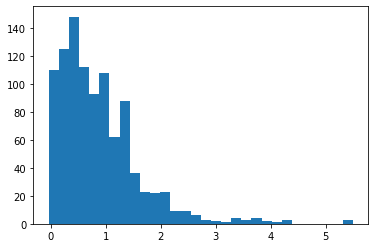

In [49]:
plt.hist(gen.scen_dict['Wind Power Partners \'94 Wind Farm']['0000'],bins=30)

In [9]:
df = pd.read_csv('/Users/xy3134/Research/PERFORM/Data/GEMINI_scenario/test/20180701/wind/Wilson_Ranch.csv')

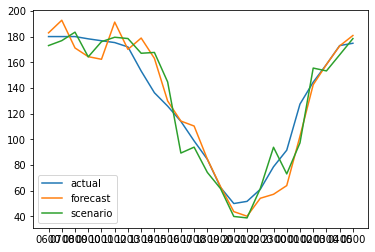

In [24]:
idx = np.random.randint(1000)
plt.plot(df.iloc[0,2:],label='actual')
plt.plot(df.iloc[1,2:],label='forecast')
plt.plot(df.iloc[idx,2:],label='scenario')
plt.legend()

(array([  1.,   0.,   0.,   1.,   1.,   1.,   0.,   2.,   0.,   0.,   4.,
          1.,   1.,   2.,   5.,   6.,   7.,  21.,  11.,  28.,  40.,  49.,
        152., 132.,  92., 107., 109.,  87.,  69.,  71.]),
 array([116.19504603, 118.64575611, 121.09646618, 123.54717626,
        125.99788634, 128.44859641, 130.89930649, 133.35001656,
        135.80072664, 138.25143671, 140.70214679, 143.15285686,
        145.60356694, 148.05427702, 150.50498709, 152.95569717,
        155.40640724, 157.85711732, 160.30782739, 162.75853747,
        165.20924754, 167.65995762, 170.1106677 , 172.56137777,
        175.01208785, 177.46279792, 179.913508  , 182.36421807,
        184.81492815, 187.26563822, 189.7163483 ]),
 <BarContainer object of 30 artists>)

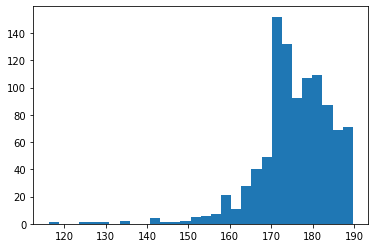

In [27]:
plt.hist(df.iloc[2:,:]['0600'],bins=30)